<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [2]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [3]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-3-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


This function is to plot the confusion matrix.


In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [5]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [6]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [8]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [9]:
# Criar a variável Y a partir da coluna Class
Y = data['Class'].to_numpy()

# Verificando o formato e os primeiros valores
print(type(Y))     # deve mostrar <class 'numpy.ndarray'>
print(Y[:10])      # exibe os 10 primeiros elementos

<class 'numpy.ndarray'>
[0 0 0 0 0 0 1 1 0 0]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [10]:
from sklearn.preprocessing import StandardScaler

# Criar o objeto scaler
scaler = StandardScaler()

# Ajustar e transformar os dados de X
X = scaler.fit_transform(X)

# Verificar dimensões e alguns valores
print(type(X))        # deve ser <class 'numpy.ndarray'>
print(X.shape)        # linhas e colunas
print(X[:5])          # primeiros 5 registros padronizados

# students get this 
transform = preprocessing.StandardScaler()

<class 'numpy.ndarray'>
(90, 83)
[[-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01 -1.05999788e-01 -1.05999788e-01 -6.54653671e-01
  -1.05999788e-01 -5.51677284e-01  3.44342023e+00 -1.85695338e-01
  -3.33333333e-01 -1.05999788e-01 -2.42535625e-01 -4.29197538e-01
   7.97724035e-01 -5.68796459e-01 -4.10890702e-01 -4.10890702e-01
  -1.50755672e-01 -7.97724035e-01 -1.50755672e-01 -3.92232270e-01
   9.43398113e+00 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.50755672e-01 -1.05999788e-01 -1.50755672e-01
  -1.50755672e-01 -1.05999788e-01 -1.50755672e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.507556

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [11]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2
)

# Verificar os tamanhos
print("Dimensão X_train:", X_train.shape)
print("Dimensão X_test:", X_test.shape)
print("Dimensão Y_train:", Y_train.shape)
print("Dimensão Y_test:", Y_test.shape)

Dimensão X_train: (72, 83)
Dimensão X_test: (18, 83)
Dimensão Y_train: (72,)
Dimensão Y_test: (18,)


we can see we only have 18 test samples.


In [12]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [13]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [14]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros a serem testados
parameters = {
    "C": [0.01, 0.1, 1],
    "penalty": ["l2"],   # apenas ridge, pois lbfgs não aceita l1
    "solver": ["lbfgs"]
}

# Criar o modelo base
lr = LogisticRegression(max_iter=1000)

# Criar o GridSearchCV com 10-fold cross-validation
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Ajustar o modelo nos dados de treino
logreg_cv.fit(X_train, Y_train)

# Mostrar melhores parâmetros e melhor score
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [16]:
# TASK 5: Calcular a acurácia nos dados de teste
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data:", test_accuracy)

Accuracy on test data: 0.8333333333333334


Lets look at the confusion matrix:


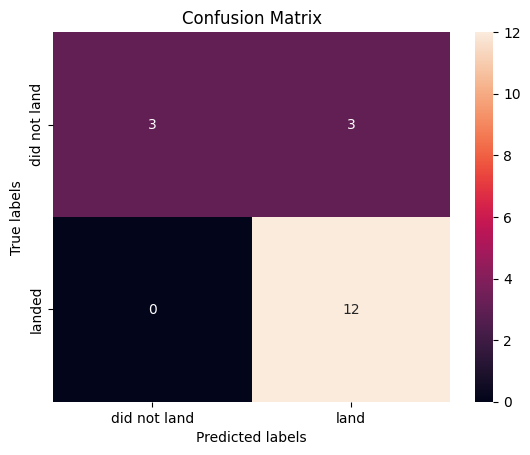

In [17]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [18]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definir os hiperparâmetros para testar
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),        # valores de C em escala logarítmica
    'gamma': np.logspace(-3, 3, 5)     # valores de gamma em escala logarítmica
}

# Criar o modelo base SVM
svm = SVC()

# Criar o GridSearchCV com 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Ajustar o modelo nos dados de treino
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [20]:
# Mostrar melhores parâmetros e melhor score
print("tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [21]:
# TASK 7: Calcular a acurácia nos dados de teste
test_accuracy = svm_cv.score(X_test, Y_test)
print("Accuracy on test data:", test_accuracy)

Accuracy on test data: 0.8333333333333334


We can plot the confusion matrix


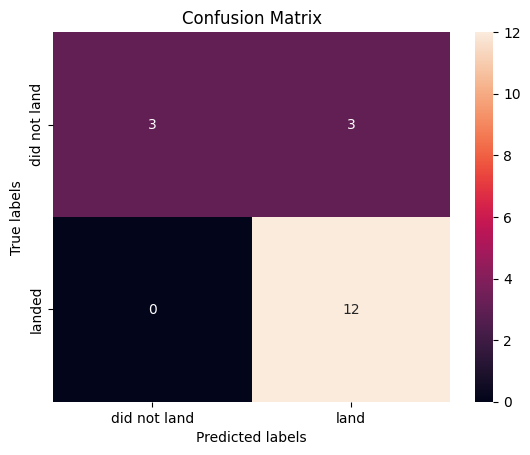

In [22]:
# Previsões no conjunto de teste
yhat = svm_cv.predict(X_test)

# Plot da matriz de confusão
plot_confusion_matrix(Y_test, yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': [None, 'sqrt', 'log2'],  # <-- troquei 'auto' por None/log2/sqrt
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
tree = DecisionTreeClassifier()

In [24]:
# Criar o modelo base
tree = DecisionTreeClassifier()

# Criar o GridSearchCV com 10-fold cross-validation
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# Ajustar o modelo nos dados de treino
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [25]:
# Mostrar melhores parâmetros e melhor score
print("tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8767857142857143


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [26]:
# TASK 9: Calcular a acurácia no conjunto de teste
test_accuracy = tree_cv.score(X_test, Y_test)
print("Accuracy on test data:", test_accuracy)

Accuracy on test data: 0.8333333333333334


We can plot the confusion matrix


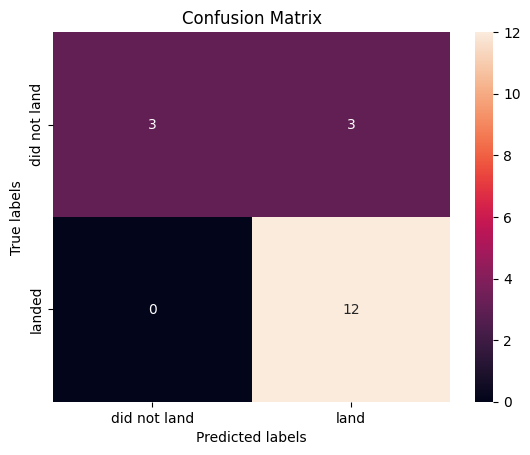

In [27]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Definir parâmetros
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

# Criar o modelo base
KNN = KNeighborsClassifier()

In [29]:
# Criar o GridSearchCV com 10-fold cross-validation
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Ajustar o modelo nos dados de treino
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [30]:
# Mostrar melhores parâmetros e melhor score
print("tuned hyperparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [31]:
# Acurácia no conjunto de teste
print("Test set accuracy: ", knn_cv.score(X_test, Y_test))

Test set accuracy:  0.8333333333333334


We can plot the confusion matrix


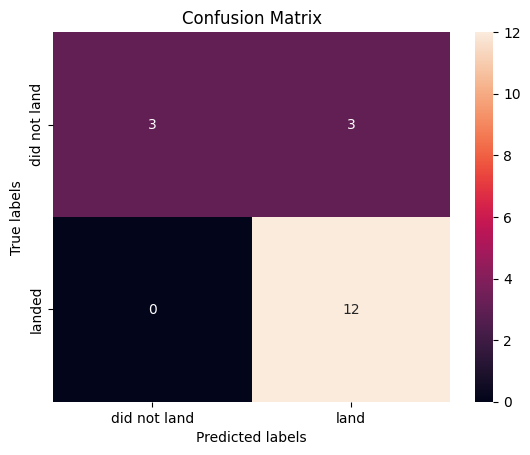

In [32]:
# Predições no conjunto de teste
yhat = knn_cv.predict(X_test)

# Matriz de confusão
plot_confusion_matrix(Y_test, yhat)

## TASK  12


Find the method performs best:


In [33]:
# Acurácia no conjunto de teste para Decision Tree
dt_test_acc = tree_cv.score(X_test, Y_test)
print("Decision Tree test accuracy:", dt_test_acc)

# Acurácia no conjunto de teste para KNN
knn_test_acc = knn_cv.score(X_test, Y_test)
print("KNN test accuracy:", knn_test_acc)

# Comparação
if dt_test_acc > knn_test_acc:
    print("➡️ O Decision Tree performou melhor")
elif knn_test_acc > dt_test_acc:
    print("➡️ O KNN performou melhor")
else:
    print("➡️ Ambos performaram igualmente")

Decision Tree test accuracy: 0.8333333333333334
KNN test accuracy: 0.8333333333333334
➡️ Ambos performaram igualmente


In [34]:
print(svm_cv.best_params_)
print("best validation accuracy:", svm_cv.best_score_)

{'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
best validation accuracy: 0.8482142857142856


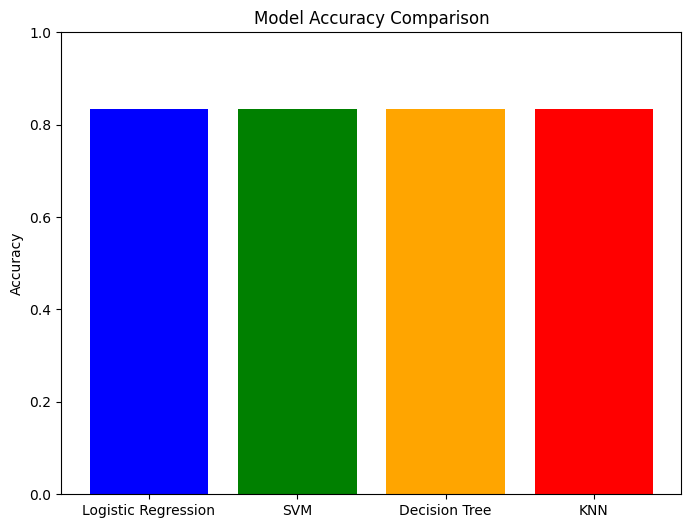

The model with the highest classification accuracy is: Logistic Regression with accuracy: 0.8333333333333334


In [35]:
import matplotlib.pyplot as plt

# Guardar os resultados (use os valores que você já calculou com .score no test set)
results = {
    "Logistic Regression": logreg_cv.score(X_test, Y_test),
    "SVM": svm_cv.score(X_test, Y_test),
    "Decision Tree": tree_cv.score(X_test, Y_test),
    "KNN": knn_cv.score(X_test, Y_test)
}

# Criar gráfico de barras
plt.figure(figsize=(8,6))
plt.bar(results.keys(), results.values(), color=['blue','green','orange','red'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

# Mostrar qual foi o melhor modelo
best_model = max(results, key=results.get)
print("The model with the highest classification accuracy is:", best_model, "with accuracy:", results[best_model])

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
